<a href="https://colab.research.google.com/github/napoleon-paxton/v3/blob/main/test_class_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**This is a test for the machine learning class**
---

In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/test_scores.csv'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [50]:
# data analysis 
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
from plotly.subplots import make_subplots
import plotly.express as px
import plotly.graph_objects as go
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [7]:
df = pd.read_csv('/test_scores.csv')
print(df.columns.values)

['school' 'school_setting' 'school_type' 'classroom' 'teaching_method'
 'n_student' 'student_id' 'gender' 'lunch' 'pretest' 'posttest']


In [8]:
display(df)

,school,school_setting,school_type,classroom,teaching_method,n_student,student_id,gender,lunch,pretest,posttest
0,ANKYI,Urban,Non-public,6OL,Standard,20.0,2FHT3,Female,Does not qualify,62.0,72.0
1,ANKYI,Urban,Non-public,6OL,Standard,20.0,3JIVH,Female,Does not qualify,66.0,79.0
2,ANKYI,Urban,Non-public,6OL,Standard,20.0,3XOWE,Male,Does not qualify,64.0,76.0
3,ANKYI,Urban,Non-public,6OL,Standard,20.0,556O0,Female,Does not qualify,61.0,77.0
4,ANKYI,Urban,Non-public,6OL,Standard,20.0,74LOE,Male,Does not qualify,64.0,76.0
...,...,...,...,...,...,...,...,...,...,...,...
2128,ZOWMK,Urban,Public,ZBH,Standard,30.0,T8LSK,Female,Does not qualify,39.0,55.0
2129,ZOWMK,Urban,Public,ZBH,Standard,30.0,VNP26,Female,Qualifies for reduced/free lunch,38.0,46.0
2130,ZOWMK,Urban,Public,ZBH,Standard,30.0,YDR1Z,Female,Qualifies for reduced/free lunch,45.0,51.0
2131,ZOWMK,Urban,Public,ZBH,Standard,30.0,YUEIH,Male,Qualifies for reduced/free lunch,46.0,53.0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2133 entries, 0 to 2132
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   school           2133 non-null   object 
 1   school_setting   2133 non-null   object 
 2   school_type      2133 non-null   object 
 3   classroom        2133 non-null   object 
 4   teaching_method  2133 non-null   object 
 5   n_student        2133 non-null   float64
 6   student_id       2133 non-null   object 
 7   gender           2133 non-null   object 
 8   lunch            2133 non-null   object 
 9   pretest          2133 non-null   float64
 10  posttest         2133 non-null   float64
dtypes: float64(3), object(8)
memory usage: 183.4+ KB


In [51]:
school = df.school.value_counts()
school_setting = df.school_setting.value_counts()
school_type = df.school_type.value_counts()
teaching_method = df.teaching_method.value_counts()
gender = df.gender.value_counts()
lunch = df.lunch.value_counts()

fig = make_subplots(
    rows=3, cols=2,
    specs=[[{"type": "pie"}, {"type": "pie"}],
          [{"type": "pie"}, {"type": "pie"}],
          [{"type": "pie"}, {"type": "pie"}]]
)

fig.add_trace(go.Pie(values=school.values, 
                     text=school.index, 
                     labels=school.index, 
                     title='School Distribution',
                     legendgroup=0), 
              row=1, col=1)

fig.add_trace(go.Pie(values=school_setting.values, 
                     text=school_setting.index, 
                     labels=school_setting.index, 
                     title='School Setting Distribution',
                     legendgroup=1), 
              row=1, col=2)

fig.add_trace(go.Pie(values=school_type.values, 
                     text=school_type.index, 
                     labels=school_type.index, 
                     title='School Type Distribution',
                     legendgroup=2), 
              row=2, col=1)

fig.add_trace(go.Pie(values=teaching_method.values, 
                     text=teaching_method.index, 
                     labels=teaching_method.index, 
                     title='Teaching Method Distribution',
                     legendgroup=3), 
              row=2, col=2)

fig.add_trace(go.Pie(values=gender.values, 
                     text=gender.index, 
                     labels=gender.index, 
                     title='Gender Distribution',
                     legendgroup=4), 
              row=3, col=1)

fig.add_trace(go.Pie(values=lunch.values, 
                     text=lunch.index, 
                     labels=lunch.index, 
                     title='Lunch Distribution',
                     legendgroup=5), 
              row=3, col=2)

fig.update_layout(height=1500, width=800, showlegend=False, extendpiecolors=False)
fig.show()

<AxesSubplot:title={'center':'Lunch Relation to Posttest Scores'}, xlabel='lunch', ylabel='posttest'>

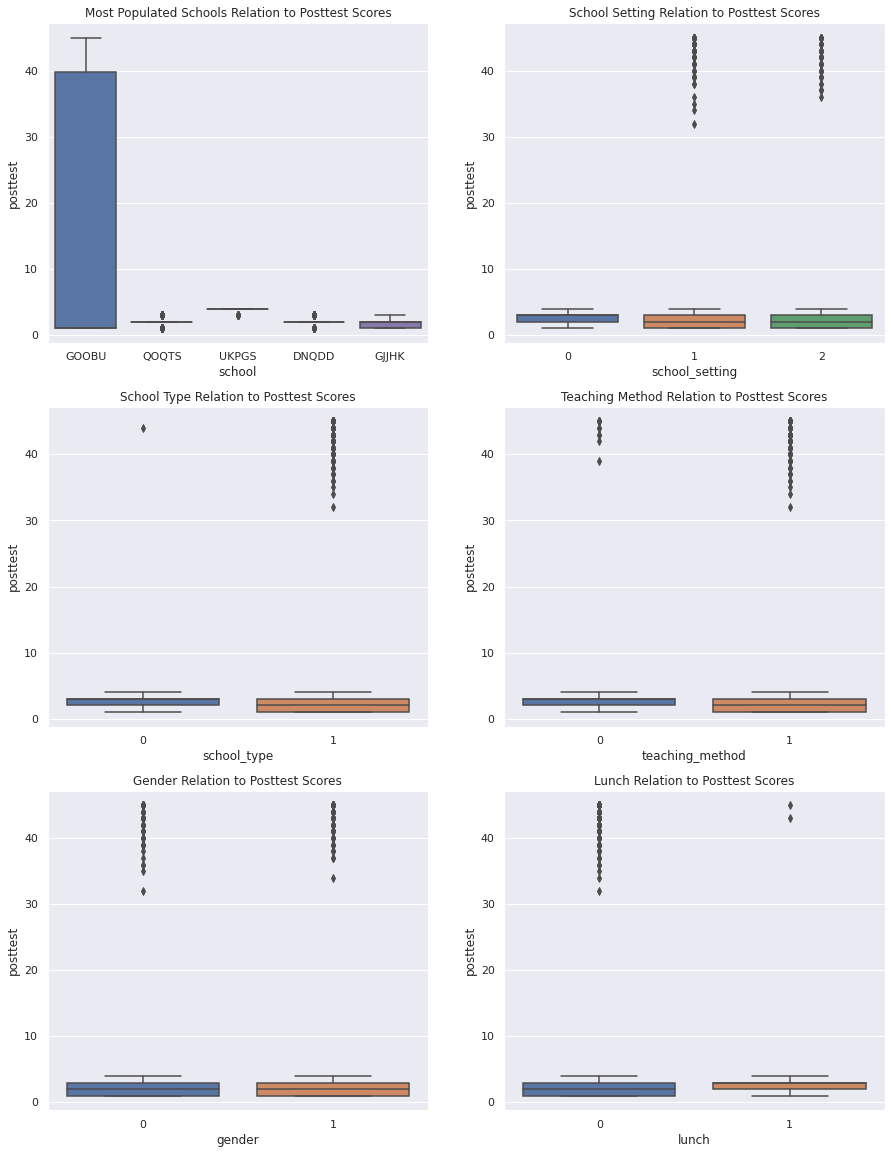

In [52]:
sns.set(style = "darkgrid")
fig, ax = plt.subplots(3, 2, figsize=(15,20))

ax[0,0].set_title("Most Populated Schools Relation to Posttest Scores")
ax[0,1].set_title("School Setting Relation to Posttest Scores")
ax[1,0].set_title("School Type Relation to Posttest Scores")
ax[1,1].set_title("Teaching Method Relation to Posttest Scores")
ax[2,0].set_title("Gender Relation to Posttest Scores")
ax[2,1].set_title("Lunch Relation to Posttest Scores")

sns.boxplot(ax = ax[0,0], data=df, x='school', y='posttest', order = df.school.value_counts().iloc[:5].index)
sns.boxplot(ax = ax[0,1], data=df, x='school_setting', y='posttest')
sns.boxplot(ax = ax[1,0], data=df, x='school_type', y='posttest')
sns.boxplot(ax = ax[1,1], data=df, x='teaching_method', y='posttest')
sns.boxplot(ax = ax[2,0], data=df, x='gender', y='posttest')
sns.boxplot(ax = ax[2,1], data=df, x='lunch', y='posttest')

From the boxplots, we can relate that the biggest impact to posttest scores is the difference of schools, as a student part of a school such as UKGPS obtains roughly 40 marks higher than a student from GOOBU. Following this is whether a student qualifies for reduced/free lunch and school type. I'm grouping these two as they correlate to each other connected by household income. Next would be the school setting, either rural, suburban or urban. And what is interesting about the data is that students who live in a suburban communities get much higher marks than those living in an urban setting and slightly higher than those in rural areas. The connection I can make to this is that parents who choose to live in suburban areas generally focus on the growth of their children, as well as there being friendly competition in the neighbourhood. Lastly, the least amount of deviation comes with different teaching methods, as both standard and experimental yield similar results with experimental being slightly higher on average.

Now lets explore the only real numerical feature,that is the number of students per class, and see its correlation to posttest marks.

In [53]:
n_students_to_posttest = df.groupby(['n_student']).agg({'posttest':'mean'}).reset_index()

print(n_students_to_posttest)

fig = px.scatter(n_students_to_posttest, x='n_student', y='posttest', size='posttest', color='n_student', 
                 size_max=60, title='Relationship between number of students and posttest results')

fig.update_layout(height=600, width=800)
fig.show()

   n_student  posttest
0          1  2.410959
1          2  6.289575
2          3  2.485294
3          4  5.939153
4         14  2.857143
5         15  2.711111
6         16  2.390625
7         17  3.183824


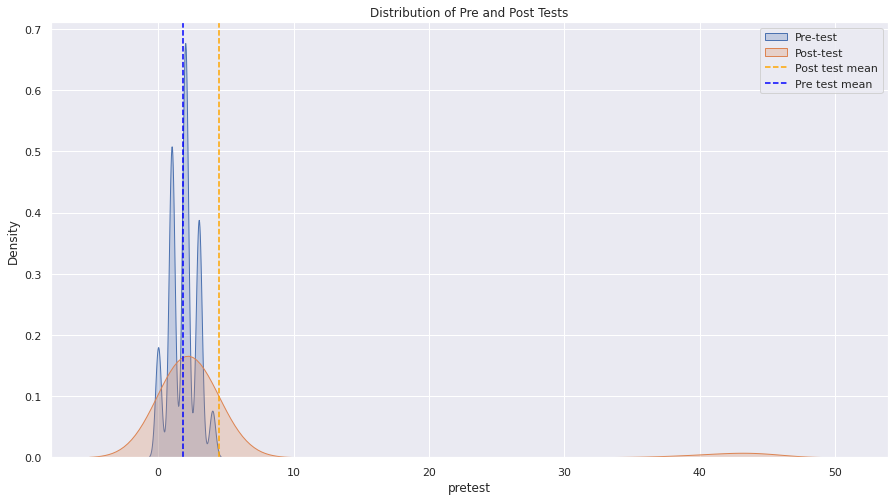

In [54]:
post_mean = df['posttest'].describe()['mean']
pre_mean = df['pretest'].describe()['mean']

plt.figure(figsize=(15,8))
plt.title('Distribution of Pre and Post Tests')
sns.kdeplot(data=df['pretest'], shade=True, label='Pre-test')
sns.kdeplot(data=df['posttest'], shade=True, label='Post-test')
plt.axvline(x=post_mean, linestyle='--', color='orange', label='Post test mean')
plt.axvline(x=pre_mean, linestyle='--', color ='blue', label='Pre test mean')
plt.legend()
plt.show()

In [10]:
df.describe()

,n_student,pretest,posttest
count,2133.000000,2133.000000,2133.000000
mean,22.796531,54.955931,67.102203
std,4.228893,13.563101,13.986789
min,14.000000,22.000000,32.000000
25%,20.000000,44.000000,56.000000
50%,22.000000,56.000000,68.000000
75%,27.000000,65.000000,77.000000
max,31.000000,93.000000,100.000000


In [11]:
df.describe(include=['O'])

,school,school_setting,school_type,classroom,teaching_method,student_id,gender,lunch
count,2133,2133,2133,2133,2133,2133,2133,2133
unique,23,3,2,97,2,2133,2,2
top,GOOBU,Urban,Public,18K,Standard,2FHT3,Male,Does not qualify
freq,158,906,1582,31,1373,1,1077,1215


In [12]:
df.isnull().sum()

school             0
school_setting     0
school_type        0
classroom          0
teaching_method    0
n_student          0
student_id         0
gender             0
lunch              0
pretest            0
posttest           0
dtype: int64

In [13]:
print('_'*40)
print('Title: school_setting')
print(df['school_setting'].value_counts())
print('_'*40)
print('Title: school_type')
print(df['school_type'].value_counts())
print('_'*40)
print('Title: teaching_method')
print(df['teaching_method'].value_counts())
print('_'*40)
print('Title: gender')
print(df['gender'].value_counts())
print('_'*40)
print('Title: lunch')
print(df['lunch'].value_counts())
print('_'*40)

________________________________________
Title: school_setting
Urban       906
Suburban    717
Rural       510
Name: school_setting, dtype: int64
________________________________________
Title: school_type
Public        1582
Non-public     551
Name: school_type, dtype: int64
________________________________________
Title: teaching_method
Standard        1373
Experimental     760
Name: teaching_method, dtype: int64
________________________________________
Title: gender
Male      1077
Female    1056
Name: gender, dtype: int64
________________________________________
Title: lunch
Does not qualify                    1215
Qualifies for reduced/free lunch     918
Name: lunch, dtype: int64
________________________________________


In [14]:
print('_'*40)
print('Title: school')
print(df['school'].value_counts())
print('_'*40)

print('Title: classroom')
print(df['classroom'].value_counts())
print('_'*40)

print('Title: n_student')
print(df['n_student'].value_counts())
print('_'*40)

print('Title: pretest')
print(df['pretest'].value_counts())
print('_'*40)

print('Title: posttest')
print(df['posttest'].value_counts())
print('_'*40)

________________________________________
Title: school
GOOBU    158
QOQTS    149
UKPGS    128
DNQDD    122
GJJHK    118
ZOWMK    117
VVTVA    114
KZKKE    111
CCAAW    109
CUQAM    107
VKWQH    100
IDGFP     94
UAGPU     87
UUUQX     84
OJOBU     81
CIMBB     74
ZMNYA     69
GOKXL     64
LAYPA     57
KFZMY     52
VHDHF     51
FBUMG     46
ANKYI     41
Name: school, dtype: int64
________________________________________
Title: classroom
18K    31
ZBH    30
QA2    30
Q0E    30
YTB    30
       ..
SSP    15
KR1    15
IQN    15
JGD    14
197    14
Name: classroom, Length: 97, dtype: int64
________________________________________
Title: n_student
22.0    264
21.0    231
27.0    189
28.0    168
20.0    160
30.0    150
24.0    144
23.0    138
17.0    136
19.0    133
25.0    125
18.0     72
16.0     64
15.0     45
31.0     31
29.0     29
14.0     28
26.0     26
Name: n_student, dtype: int64
________________________________________
Title: pretest
60.0    73
63.0    64
58.0    63
59.0    61
62.0 

In [15]:
#above_average: Students with above average post-test scores:
df['above_average'] = df['posttest']
df.loc[ df['above_average'] < 60.0, 'above_average'] = 0
df.loc[ df['above_average'] >= 60.0, 'above_average'] = 1
df['above_average'] = df['above_average'].astype(int)  
df.head()

,school,school_setting,school_type,classroom,teaching_method,n_student,student_id,gender,lunch,pretest,posttest,above_average
0,ANKYI,Urban,Non-public,6OL,Standard,20.0,2FHT3,Female,Does not qualify,62.0,72.0,1
1,ANKYI,Urban,Non-public,6OL,Standard,20.0,3JIVH,Female,Does not qualify,66.0,79.0,1
2,ANKYI,Urban,Non-public,6OL,Standard,20.0,3XOWE,Male,Does not qualify,64.0,76.0,1
3,ANKYI,Urban,Non-public,6OL,Standard,20.0,556O0,Female,Does not qualify,61.0,77.0,1
4,ANKYI,Urban,Non-public,6OL,Standard,20.0,74LOE,Male,Does not qualify,64.0,76.0,1


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


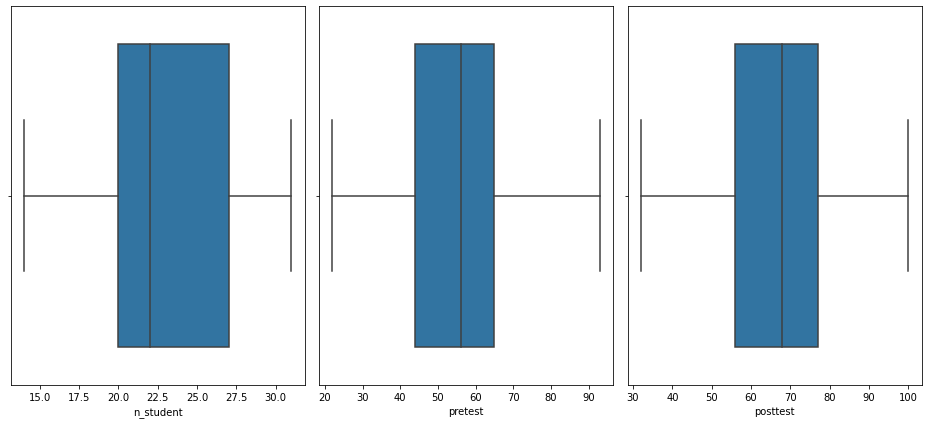

In [16]:
f, axes = plt.subplots(1, 3,figsize=(13,6))
sns.boxplot(df.n_student, ax=axes[0])
sns.boxplot(df.pretest, ax=axes[1])
sns.boxplot(df.posttest, ax=axes[2])
plt.tight_layout()
plt.show()

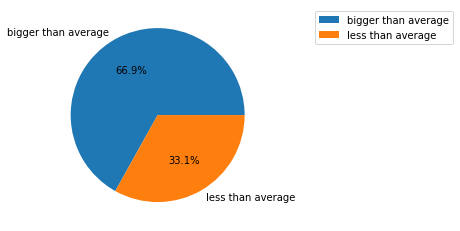

In [17]:
above_average = df['above_average'].value_counts()
sort = ['bigger than average', 'less than average ']
plt.pie(above_average, labels=sort, autopct = '%1.1f%%')
plt.legend(sort, bbox_to_anchor=(1.2, 1))

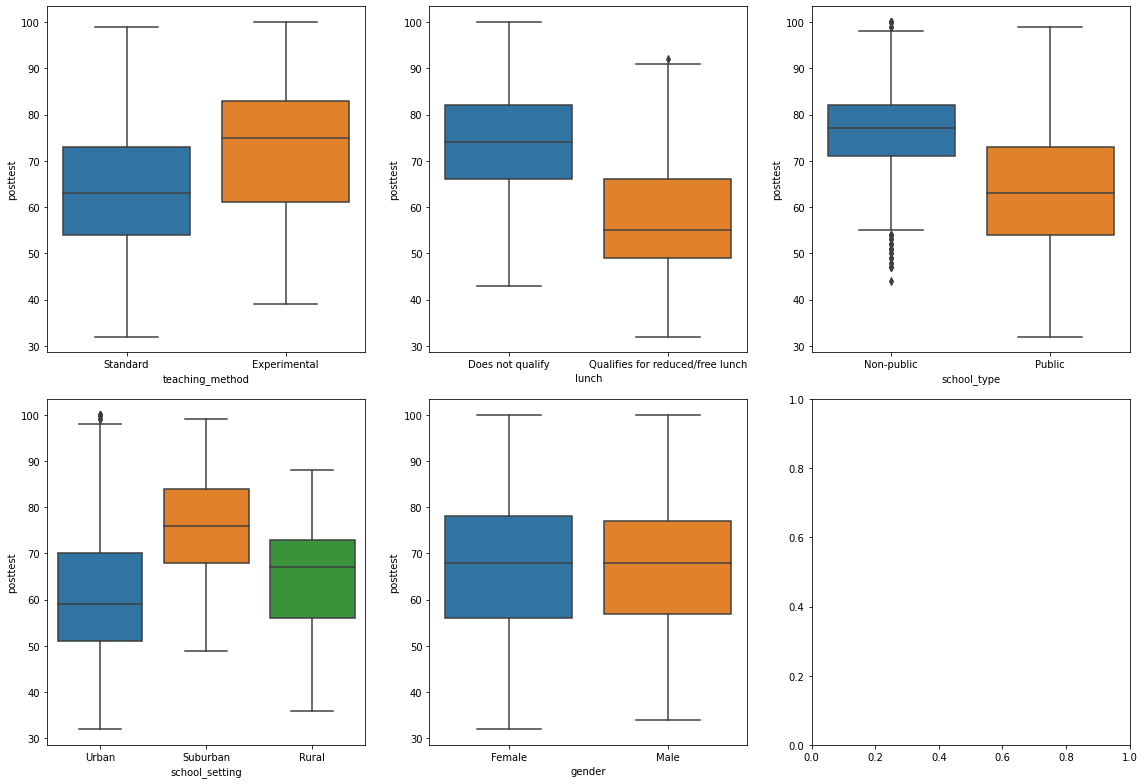

In [18]:
f, axes = plt.subplots(2, 3,figsize=(16,11))
sns.boxplot(data=df, x='teaching_method', y='posttest', ax=axes[0, 0])
sns.boxplot(data=df, x='lunch', y='posttest', ax=axes[0, 1])
sns.boxplot(data=df, x='school_type', y='posttest', ax=axes[0,2])
sns.boxplot(data=df, x='school_setting', y='posttest', ax=axes[1, 0])
sns.boxplot(data=df, x='gender', y='posttest', ax=axes[1, 1])
plt.tight_layout()
plt.show()

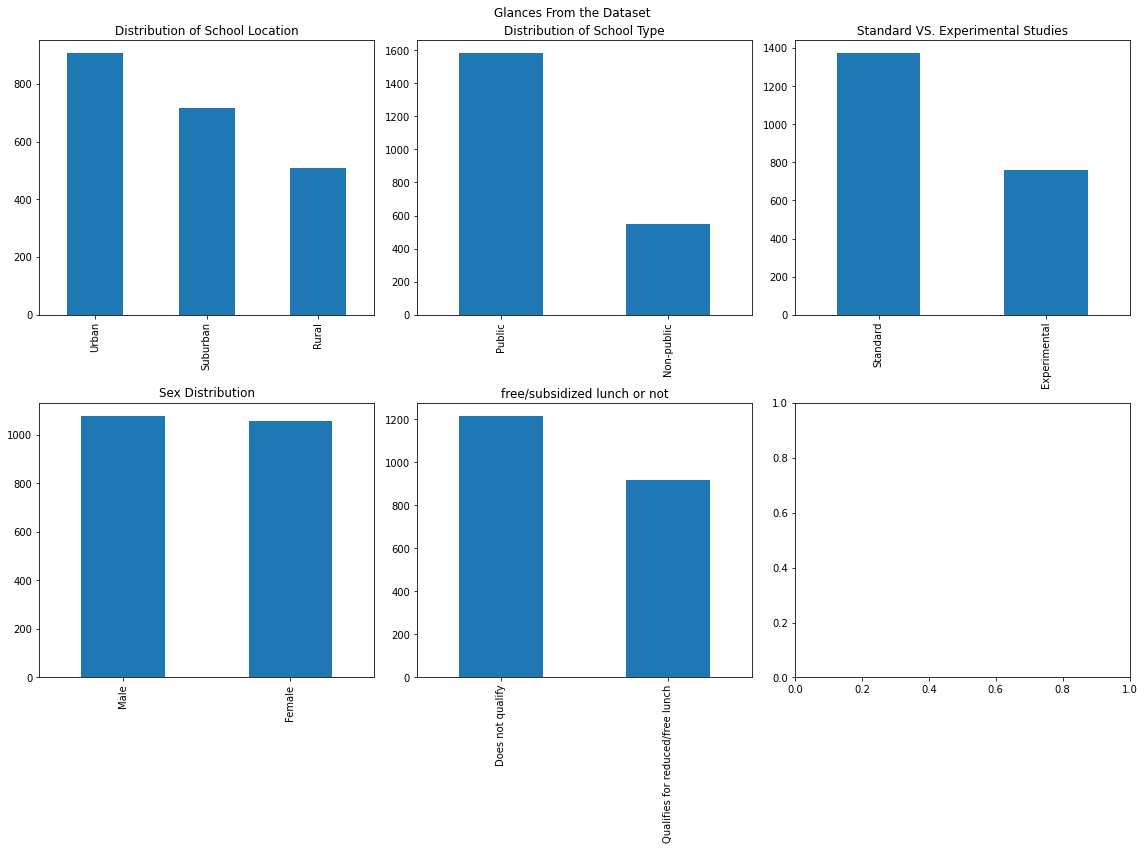

In [19]:
f, axes = plt.subplots(2,3)
df['school_setting'].value_counts().plot(kind='bar', ax=axes[0,0], figsize=(16,12))
df['school_type'].value_counts().plot(kind='bar', ax=axes[0,1])
df['teaching_method'].value_counts().plot(kind='bar', ax=axes[0,2])
df['gender'].value_counts().plot(kind='bar', ax=axes[1,0])
df['lunch'].value_counts().plot(kind='bar', ax=axes[1,1])

f.suptitle('Glances From the Dataset')
axes[0,0].set_title('Distribution of School Location')
axes[0,1].set_title('Distribution of School Type')
axes[0,2].set_title('Standard VS. Experimental Studies')
axes[1,0].set_title('Sex Distribution')
axes[1,1].set_title('free/subsidized lunch or not')
plt.tight_layout()

In [20]:
to_exchange = {
    'Public' : 1,
    'Non-public' : 0
}
df.school_type = df.school_type.map(to_exchange)

to_exchange = {    
    'Male' : 1,
    'Female' : 0
}
df.gender = df.gender.map(to_exchange)

to_exchange = {    
    'Rural' :2,
    'Urban' : 1,
    'Suburban' : 0
}
df.school_setting = df.school_setting.map(to_exchange)

to_exchange = {   
    'Standard' : 1,
    'Experimental' : 0
}
df.teaching_method = df.teaching_method.map(to_exchange)

to_exchange = {    
    'Does not qualify' : 1,
    'Qualifies for reduced/free lunch' : 0
}
df.lunch = df.lunch.map(to_exchange)
display(df)

,school,school_setting,school_type,classroom,teaching_method,n_student,student_id,gender,lunch,pretest,posttest,above_average
0,ANKYI,1,0,6OL,1,20.0,2FHT3,0,1,62.0,72.0,1
1,ANKYI,1,0,6OL,1,20.0,3JIVH,0,1,66.0,79.0,1
2,ANKYI,1,0,6OL,1,20.0,3XOWE,1,1,64.0,76.0,1
3,ANKYI,1,0,6OL,1,20.0,556O0,0,1,61.0,77.0,1
4,ANKYI,1,0,6OL,1,20.0,74LOE,1,1,64.0,76.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
2128,ZOWMK,1,1,ZBH,1,30.0,T8LSK,0,1,39.0,55.0,0
2129,ZOWMK,1,1,ZBH,1,30.0,VNP26,0,0,38.0,46.0,0
2130,ZOWMK,1,1,ZBH,1,30.0,YDR1Z,0,0,45.0,51.0,0
2131,ZOWMK,1,1,ZBH,1,30.0,YUEIH,1,0,46.0,53.0,0


In [21]:
df['n_studentGroup'] = pd.cut(df['n_student'], 5)
df[['n_studentGroup']].groupby(['n_studentGroup'], as_index=False).mean().sort_values(by='n_studentGroup', ascending=True)

,n_studentGroup
0,"(13.983, 17.4]"
1,"(17.4, 20.8]"
2,"(20.8, 24.2]"
3,"(24.2, 27.6]"
4,"(27.6, 31.0]"


In [22]:
df.loc[ df['n_student'] <= 13.0, 'n_student'] = 0
df.loc[(df['n_student'] > 17.0) & (df['n_student'] <= 20.0), 'n_student'] = 1
df.loc[(df['n_student'] > 20.0) & (df['n_student'] <= 24.0), 'n_student'] = 2
df.loc[(df['n_student'] > 24.0) & (df['n_student'] <= 27.0), 'n_student'] = 3
df.loc[ df['n_student'] > 27.0, 'n_student'] = 4
df['n_student'] = df['n_student'].astype(int)    
df.head()

,school,school_setting,school_type,classroom,teaching_method,n_student,student_id,gender,lunch,pretest,posttest,above_average,n_studentGroup
0,ANKYI,1,0,6OL,1,1,2FHT3,0,1,62.0,72.0,1,"(17.4, 20.8]"
1,ANKYI,1,0,6OL,1,1,3JIVH,0,1,66.0,79.0,1,"(17.4, 20.8]"
2,ANKYI,1,0,6OL,1,1,3XOWE,1,1,64.0,76.0,1,"(17.4, 20.8]"
3,ANKYI,1,0,6OL,1,1,556O0,0,1,61.0,77.0,1,"(17.4, 20.8]"
4,ANKYI,1,0,6OL,1,1,74LOE,1,1,64.0,76.0,1,"(17.4, 20.8]"


In [23]:
df['pretestGroup'] = pd.cut(df['pretest'], 5)
df[['pretestGroup']].groupby(['pretestGroup'], as_index=False).mean().sort_values(by='pretestGroup', ascending=True)

,pretestGroup
0,"(21.929, 36.2]"
1,"(36.2, 50.4]"
2,"(50.4, 64.6]"
3,"(64.6, 78.8]"
4,"(78.8, 93.0]"


In [24]:
df.loc[ df['pretest'] <= 36.0, 'pretest'] = 0
df.loc[(df['pretest'] > 36.0) & (df['pretest'] <= 50.0), 'pretest'] = 1
df.loc[(df['pretest'] > 50.0) & (df['pretest'] <= 64.0), 'pretest'] = 2
df.loc[(df['pretest'] > 64.0) & (df['pretest'] <= 78.0), 'pretest'] = 3
df.loc[ df['pretest'] > 78.0, 'pretest'] = 4
df['pretest'] = df['pretest'].astype(int)    
df.head()

,school,school_setting,school_type,classroom,teaching_method,n_student,student_id,gender,lunch,pretest,posttest,above_average,n_studentGroup,pretestGroup
0,ANKYI,1,0,6OL,1,1,2FHT3,0,1,2,72.0,1,"(17.4, 20.8]","(50.4, 64.6]"
1,ANKYI,1,0,6OL,1,1,3JIVH,0,1,3,79.0,1,"(17.4, 20.8]","(64.6, 78.8]"
2,ANKYI,1,0,6OL,1,1,3XOWE,1,1,2,76.0,1,"(17.4, 20.8]","(50.4, 64.6]"
3,ANKYI,1,0,6OL,1,1,556O0,0,1,2,77.0,1,"(17.4, 20.8]","(50.4, 64.6]"
4,ANKYI,1,0,6OL,1,1,74LOE,1,1,2,76.0,1,"(17.4, 20.8]","(50.4, 64.6]"


In [25]:
df['posttestGroup'] = pd.cut(df['posttest'], 5)
df[['posttestGroup']].groupby(['posttestGroup'], as_index=False).mean().sort_values(by='posttestGroup', ascending=True)

,posttestGroup
0,"(31.932, 45.6]"
1,"(45.6, 59.2]"
2,"(59.2, 72.8]"
3,"(72.8, 86.4]"
4,"(86.4, 100.0]"


In [26]:
df.loc[ df['posttest'] <= 31.0, 'posttest'] = 0
df.loc[(df['posttest'] > 45.0) & (df['posttest'] <= 59.0), 'posttest'] = 1
df.loc[(df['posttest'] > 59.0) & (df['posttest'] <= 72.0), 'posttest'] = 2
df.loc[(df['posttest'] > 72.0) & (df['posttest'] <= 86.0), 'posttest'] = 3
df.loc[ df['posttest'] > 86.0, 'posttest'] = 4
df['posttest'] = df['posttest'].astype(int)    
df.head()

,school,school_setting,school_type,classroom,teaching_method,n_student,student_id,gender,lunch,pretest,posttest,above_average,n_studentGroup,pretestGroup,posttestGroup
0,ANKYI,1,0,6OL,1,1,2FHT3,0,1,2,2,1,"(17.4, 20.8]","(50.4, 64.6]","(59.2, 72.8]"
1,ANKYI,1,0,6OL,1,1,3JIVH,0,1,3,3,1,"(17.4, 20.8]","(64.6, 78.8]","(72.8, 86.4]"
2,ANKYI,1,0,6OL,1,1,3XOWE,1,1,2,3,1,"(17.4, 20.8]","(50.4, 64.6]","(72.8, 86.4]"
3,ANKYI,1,0,6OL,1,1,556O0,0,1,2,3,1,"(17.4, 20.8]","(50.4, 64.6]","(72.8, 86.4]"
4,ANKYI,1,0,6OL,1,1,74LOE,1,1,2,3,1,"(17.4, 20.8]","(50.4, 64.6]","(72.8, 86.4]"


In [27]:
df = df.drop(columns = ["student_id", "pretestGroup", "posttestGroup", "n_studentGroup", "above_average"], axis=1)
df.head()

,school,school_setting,school_type,classroom,teaching_method,n_student,gender,lunch,pretest,posttest
0,ANKYI,1,0,6OL,1,1,0,1,2,2
1,ANKYI,1,0,6OL,1,1,0,1,3,3
2,ANKYI,1,0,6OL,1,1,1,1,2,3
3,ANKYI,1,0,6OL,1,1,0,1,2,3
4,ANKYI,1,0,6OL,1,1,1,1,2,3


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2133 entries, 0 to 2132
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   school           2133 non-null   object
 1   school_setting   2133 non-null   int64 
 2   school_type      2133 non-null   int64 
 3   classroom        2133 non-null   object
 4   teaching_method  2133 non-null   int64 
 5   n_student        2133 non-null   int64 
 6   gender           2133 non-null   int64 
 7   lunch            2133 non-null   int64 
 8   pretest          2133 non-null   int64 
 9   posttest         2133 non-null   int64 
dtypes: int64(8), object(2)
memory usage: 166.8+ KB


In [29]:
x = df[["school_setting","school_type","teaching_method","n_student","gender","lunch","pretest"]]
x.head()

,school_setting,school_type,teaching_method,n_student,gender,lunch,pretest
0,1,0,1,1,0,1,2
1,1,0,1,1,0,1,3
2,1,0,1,1,1,1,2
3,1,0,1,1,0,1,2
4,1,0,1,1,1,1,2


In [30]:
y = df["posttest"]
y.head()

0    2
1    3
2    3
3    3
4    3
Name: posttest, dtype: int64

In [31]:
df.shape

(2133, 10)

In [32]:
train_x = x[:1600]
train_y = y[:1600]
test_x = x[1600:]
test_y = y[1600:]

print("We will train with %d elements and test with %d elements" % (len(train_x), len(test_x)))

We will train with 1600 elements and test with 533 elements


In [33]:
train_x.shape, train_y.shape, test_x.shape

((1600, 7), (1600,), (533, 7))

In [34]:
# Logistic Regression

logreg = LogisticRegression()
logreg.fit(train_x, train_y)
pred = logreg.predict(test_x)
acc_log = round(logreg.score(train_x, train_y) * 100, 2)
acc_log

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


73.56

In [35]:
# Support Vector Machines

svc = SVC()
svc.fit(train_x, train_y)
pred = svc.predict(test_x)
acc_svc = round(svc.score(train_x, train_y) * 100, 2)
acc_svc

73.38

In [45]:
# k-Nearest Neighbors

knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(train_x, train_y)
pred = knn.predict(test_x)
acc_knn = round(knn.score(train_x, train_y) * 100, 2)
acc_knn

76.5

In [46]:
print(pred)

[ 3  3  2  2  3  3  3  3  3  2  2  2  3  2  3  3  3  3  3  2  3  3  3  3
  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3
  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3
  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  2  3
  3  3  3  3  3  3  2  3  2  2  3  3  3  3  3  3  3  3  3  3  2  3  2  3
  3  3  2  2  2  2  3  3  2  2  3  2  3  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  2  2  2  3  2  2  3  2  2  2  3  3  3  2  3  3  3
  2  3  3  2  3  2  2  2  2  3  3  3  3  3  2  2  3  3  3  3  3  2  3  2
  1  1  1  1  1  1  2  1  1  1  1  1  1  3  1  3  1  2  1  2  2  2  2  2
  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 43  1 40 43
 43 40 40 40 40 40 43 40 40 43 40 40 40 43 43 40 43 43  1 43 43 40 40 40
 43 43 43 43  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1 43 40  2  1 43 40 43 43 43 40 43 40

In [37]:
gaussian = GaussianNB()
gaussian.fit(train_x, train_y)
pred = gaussian.predict(test_x)
acc_gaussian = round(gaussian.score(train_x, train_y) * 100, 2)
acc_gaussian

49.56

In [38]:
# Perceptron

perceptron = Perceptron()
perceptron.fit(train_x, train_y)
pred = perceptron.predict(test_x)
acc_perceptron = round(perceptron.score(train_x, train_y) * 100, 2)
acc_perceptron

47.0

In [39]:
# Linear SVC

linear_svc = LinearSVC()
linear_svc.fit(train_x, train_y)
pred = linear_svc.predict(test_x)
acc_linear_svc = round(linear_svc.score(train_x, train_y) * 100, 2)
acc_linear_svc

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


68.0

In [40]:
# Stochastic Gradient Descent

sgd = SGDClassifier()
sgd.fit(train_x, train_y)
pred = sgd.predict(test_x)
acc_sgd = round(sgd.score(train_x, train_y) * 100, 2)
acc_sgd

44.31

In [41]:
# Decision Tree

decision_tree = DecisionTreeClassifier()
decision_tree.fit(train_x, train_y)
pred = decision_tree.predict(test_x)
acc_decision_tree = round(decision_tree.score(train_x, train_y) * 100, 2)
acc_decision_tree

80.25

In [42]:
# Random Forest

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(train_x, train_y)
pred = random_forest.predict(test_x)
random_forest.score(train_x, train_y)
acc_random_forest = round(random_forest.score(train_x, train_y) * 100, 2)
acc_random_forest

80.25

In [44]:
print(pred)

[ 2  3  3  3  3  3  2  3  2  3  3  3  2  3  3  3  3  3  3  3  3  3  3  3
  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3
  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3
  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  1  3
  3  3  3  3  3  3  1  3  2  1  3  1  3  1  1  1  1  1  1  3  1  3  3  3
  3  3  3  3  2  3  3  3  3  3  3  3  2  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  2  2  2  3  2  2  2  2  2  2  2  3  2  2  3  2  3
  2  2  3  2  3  2  2  2  2  2  2  2  3  2  2  2  2  2  3  2  2  2  2  2
  1  1  1  1  1  1  2  1  1  1  1  1  1  2  1  2  1  2  1  2  2  2  2  2
  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 43  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  2  2  1  1  1  1  1  1  1  1

In [43]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree'],
    'Score': [acc_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_linear_svc, acc_decision_tree]})
models.sort_values(by='Score', ascending=False)

,Model,Score
3,Random Forest,80.25
8,Decision Tree,80.25
1,KNN,76.50
2,Logistic Regression,73.56
0,Support Vector Machines,73.38
7,Linear SVC,68.00
4,Naive Bayes,49.56
5,Perceptron,47.00
6,Stochastic Gradient Decent,44.31


In [55]:
# Function: if score >100, return 100
limit = lambda x: 100 if x>100 else x
vect_limit = np.vectorize(limit)

# Map to y_pred
y_pred = vect_limit(np.round(lr.predict(X_test),1))

# Create result
result = X_test.copy()
result["Actual post-test score"] = y_test
result["Predited post-test score"] = y_pred

NameError: ignored